In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sample_generator import generate_sample
from uniform_prior_sampler import uniform_prior

In [36]:
true_pars = uniform_prior()

In [37]:
print(true_pars)

{'omega_m': 0.19797310459089723, 'sigma_8': 0.7142791118586115, 'h0': 76.74505011229456, 'ns': 0.9945571256688572, 'ob': 0.04752379422873177, 'a_cr': 0.24342929146521292, 'b_cr': 1.249327265552909, 'delta_cr': -0.1622041106900025, 'gamma_cr': 2.038218643710607, 'sigma_cr': 0.38058734949366246, 'a_l': 45.42804231119087, 'b_l': 2.6052123635657347, 'delta_l': 0.7011744988856159, 'gamma_l': 1.8584561549506544, 'sigma_l': 0.9185105295449638, 'r_cr_l': 0.447280283548963}


In [38]:
cat = generate_sample(true_pars)

In [39]:
len(cat)

965

In [40]:
df = pd.DataFrame(cat, columns=["Z", "CR", "LAMBDA", "EXP"])

In [41]:
df.describe()

,Z,CR,LAMBDA,EXP
count,965.000000,965.000000,965.000000,965.000000
mean,0.292206,0.552202,52.442921,345.812073
std,0.147614,0.542194,63.076832,328.754059
min,0.100002,0.023344,3.005571,72.679901
25%,0.174464,0.195202,9.310049,144.846756
50%,0.251788,0.391080,26.149971,216.688660
75%,0.379108,0.693606,70.147926,412.836761
max,0.789004,4.624203,296.828949,2248.887451


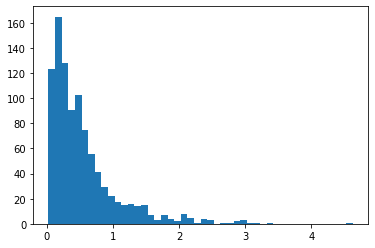

In [42]:
plt.hist(df["CR"], bins='auto')
plt.show()

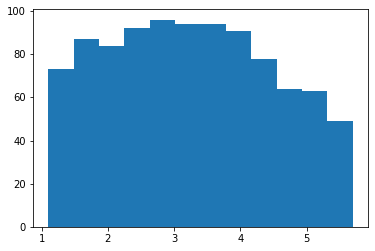

In [43]:
plt.hist(np.log(df["LAMBDA"]), bins='auto')
plt.show()

In [44]:
df["EXP"].min()

72.6799

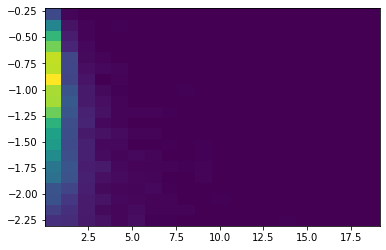

In [26]:
plt.hist2d(df["CR"], np.log(df["Z"]), bins=20)
plt.show()

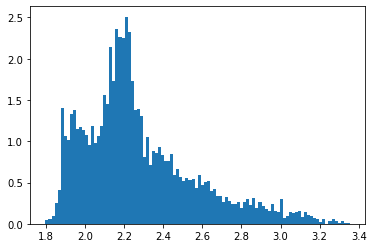

In [27]:
plt.hist(np.log10(df["EXP"]), bins=100, density=True)
plt.show()

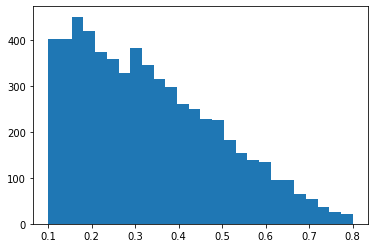

In [28]:
plt.hist(df["Z"], bins='auto')
plt.show()

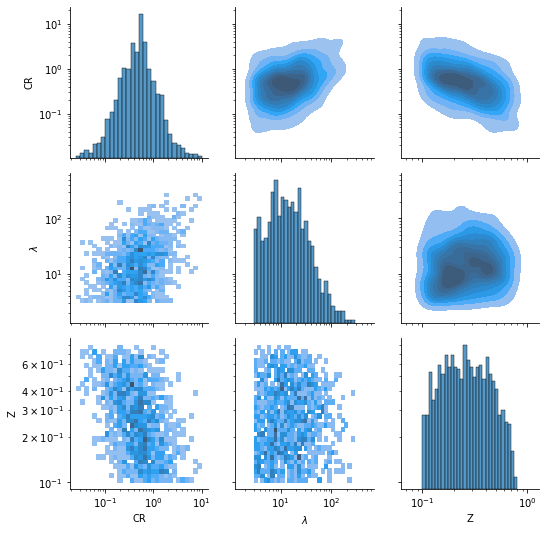

In [15]:
g = sns.PairGrid(
    df[df["CR"]>0.01].rename(columns={"LAMBDA": r"$\lambda$"})[["CR", r"$\lambda$", 'Z']], 
    diag_sharey=False)
g.map_lower(sns.histplot, log_scale=True, bins=30)
g.map_diag(sns.histplot, log_scale=True, bins=30)
g.map_upper(sns.kdeplot, fill=True, log_scale=True)